In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

## Load

### Separate Datasets

In [15]:
# ## Raw non uniform data

# df_M_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Archive\df_full_M2.csv")
# df_G_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Archive\df_full_G_2.csv")
# df_T_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Archive\df_full_T2.csv")


In [159]:
# Uniform data separate

df_M_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\df_full_M_uniform_bis.csv")
df_G_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\df_full_G_uniform_bis.csv")
df_T_Full = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\df_full_T_uniform_bis.csv")

In [160]:

## Datetime conversions for M dataset
df_M_Full['Contract_Date'] = pd.to_datetime(df_M_Full['Contract_Date'])
df_M_Full['Leave_Date'] = pd.to_datetime(df_M_Full['Leave_Date'])
df_M_Full['Entry_Date_Company_1'] = pd.to_datetime(df_M_Full['Entry_Date_Company_1'])

## Datetime conversions for T dataset
df_T_Full['Absence_Start_Date'] = pd.to_datetime(df_T_Full['Absence_Start_Date'])
df_T_Full['Absence_End_Date'] = pd.to_datetime(df_T_Full['Absence_End_Date'])
df_T_Full['Payroll_Period'] = pd.to_datetime(df_T_Full['Payroll_Period'] )

## Datetime conversions for G dataset
df_G_Full['Contract_Date'] = pd.to_datetime(df_G_Full['Contract_Date'])
df_G_Full['Leave_Date'] = pd.to_datetime(df_G_Full['Leave_Date'])

### Merged Datasets

In [66]:

# One Class
d_GTM = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN.csv")

# Multilabel Binarized
# d_GTM_multilabel = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN_multilab_binarized.csv")

d_GTM_multilabel = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN.csv")


In [67]:

## Datetime conversions for M features
d_GTM['Contract_Date'] = pd.to_datetime(d_GTM['Contract_Date'])
d_GTM['Leave_Date'] = pd.to_datetime(d_GTM['Leave_Date'])
d_GTM['Entry_Date_Company_1'] = pd.to_datetime(d_GTM['Entry_Date_Company_1'])

## Datetime conversions for T features
d_GTM['Absence_Start_Date'] = pd.to_datetime(d_GTM['Absence_Start_Date'])
d_GTM['Absence_End_Date'] = pd.to_datetime(d_GTM['Absence_End_Date'])
d_GTM['Payroll_Period'] = pd.to_datetime(d_GTM['Payroll_Period'] )

## Datetime conversions for G features
# d_GTM['Entry_Date'] = pd.to_datetime(d_GTM['Entry_Date'])
d_GTM['Leave_Date'] = pd.to_datetime(d_GTM['Leave_Date'])

In [68]:

## Datetime conversions for M features
d_GTM_multilabel['Contract_Date'] = pd.to_datetime(d_GTM_multilabel['Contract_Date'])
d_GTM_multilabel['Leave_Date'] = pd.to_datetime(d_GTM_multilabel['Leave_Date'])
d_GTM_multilabel['Entry_Date_Company_1'] = pd.to_datetime(d_GTM_multilabel['Entry_Date_Company_1'])

## Datetime conversions for T features
d_GTM_multilabel['Absence_Start_Date'] = pd.to_datetime(d_GTM_multilabel['Absence_Start_Date'])
d_GTM_multilabel['Absence_End_Date'] = pd.to_datetime(d_GTM_multilabel['Absence_End_Date'])
d_GTM_multilabel['Payroll_Period'] = pd.to_datetime(d_GTM_multilabel['Payroll_Period'] )

## Datetime conversions for G features
d_GTM_multilabel['Leave_Date'] = pd.to_datetime(d_GTM_multilabel['Leave_Date'])

### Implmentation details

In [206]:
# d_GTM_multilabel = d_GTM.iloc[:,:]

In [69]:
d_GTM_multilabel['Fraud'].value_counts()

Fraud
0    12965
3      938
2      934
1      721
Name: count, dtype: int64

In [73]:
d_GTM_multilabel.replace({0:'Not Fraud',1:'Ghost',2:'Timesheet',3:'Misclassification'}, inplace=True)

In [74]:
d_GTM_multilabel['Fraud'].value_counts()

Fraud
Not Fraud            12965
Misclassification      938
Timesheet              934
Ghost                  721
Name: count, dtype: int64

In [76]:
d_GTM_multilabel.to_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN_multilab_text_labels.csv",index=False)

# Datasets compositions

In [4]:
print(f"Percentage of fraud cases Ghost Worker : {df_G_Full[df_G_Full['Fraud'] == 1]['Fraud'].shape[0] / df_G_Full.shape[0]} " + "%")
print(f"Percentage of fraud cases Timesheet : {df_T_Full[df_T_Full['Fraud'] == 2]['Fraud'].shape[0] / df_T_Full.shape[0]} " + "%")
print(f"Percentage of fraud cases Misclassification : {df_M_Full[df_M_Full['Fraud'] == 3]['Fraud'].shape[0] / df_M_Full.shape[0]} " + "%")

Percentage of fraud cases Ghost Worker : 0.16666666666666666 %
Percentage of fraud cases Timesheet : 0.16666666666666666 %
Percentage of fraud cases Misclassification : 0.16666666666666666 %


# Data Treatments:

##### Merge all 3 Datasets

In [161]:
df_M_Full

PersonID  Seniority_previous_company(N-2) (in days)  \
0       400335                                          0   
1       400336                                          0   
2       400337                                       3650   
3       400338                                          0   
4       400339                                          0   
...        ...                                        ...   
5623     14685                                          0   
5624     14686                                          0   
5625     14687                                          0   
5626     14688                                          0   
5627     14689                                          0   

      Contract_in_group_duration (in days)  \
0                                    16485   
1                                    12667   
2                                    17280   
3                                    12000   
4                                    11990   
...                                    ...   
5623                                    48   
5624                                    51   
5625                                    48   
5626                                     8   
5627                                  3817   

      Seniority_previous_company(N-1) (in days)  Seniority_in_Group (in days)  \
0                                             0                         12400   
1                                             0                         11777   
2                                             0                          1200   
3                                             0                         14880   
4                                          1096                         12900   
...                                         ...                           ...   
5623                                      96470                            51   
5624                                      94871                            48   
5625                                      96470                            48   
5626                                      94864                             8   
5627                                      94871                          3817   

     Contract_Date Leave_Date Entry_Date_Company_1 Qualification       CODENT  \
0       2017-01-18 2050-12-31           1753-01-01           Mrs  ReRecruited   
1       2018-03-10 2050-12-31           1753-01-01            Mr  ReRecruited   
2       2017-01-01 2050-12-31           1753-01-01            Mr  New Recruit   
3       2010-05-04 2050-12-31           1753-01-01            Mr  New Recruit   
4       2022-03-15 2050-12-31           2019-03-15          Miss     Mutation   
...            ...        ...                  ...           ...          ...   
5623    2017-02-16 2012-11-21           2012-10-01            Mr  New Recruit   
5624    2012-10-01 2017-04-05           2017-02-16            Mr  New Recruit   
5625    2017-02-16 2017-04-05           2017-02-16            Mr  New Recruit   
5626    2012-09-24 2012-10-02           2012-09-24            Mr  New Recruit   
5627    2012-10-01 2023-03-15           2012-10-01            Mr  ReRecruited   

     Classification  Work_form        CODSOR Current_company Leave_Category  \
0       Employee E4  Full Time  Currently IN             TMG    Unspecified   
1        Supervisor  Full Time  Currently IN             TWW    Unspecified   
2      Executive C3  Full Time  Currently IN     UNSPECIFIED    Unspecified   
3        Supervisor  Full Time  Currently IN             ITI    Unspecified   
4       Employee E1  Full Time  Currently IN             PRO         TRANSF   
...             ...        ...           ...             ...            ...   
5623       Employee  Full Time          Left             TWW         VOLUNT   
5624       Employee  Full Time          Left             TWW         VOLUNT   
5625       Employee  Full Time          Left             TWW   

In [162]:
d_TM = pd.merge(df_M_Full, df_T_Full, on='PersonID', how='outer', suffixes=('', '_dup'))

In [163]:
columns_to_process = [col for col in d_TM.columns if '_dup' in col]

for col in columns_to_process:
    original_col = col.replace('_dup', '')
    d_TM[original_col] = d_TM[original_col].fillna(d_TM[col])
    d_TM.drop(columns=[col], inplace=True)

In [164]:
d_TM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   PersonID                                   11232 non-null  int64         
 1   Seniority_previous_company(N-2) (in days)  5628 non-null   float64       
 2   Contract_in_group_duration (in days)       5628 non-null   float64       
 3   Seniority_previous_company(N-1) (in days)  5628 non-null   float64       
 4   Seniority_in_Group (in days)               5628 non-null   float64       
 5   Contract_Date                              5628 non-null   datetime64[ns]
 6   Leave_Date                                 5628 non-null   datetime64[ns]
 7   Entry_Date_Company_1                       5628 non-null   datetime64[ns]
 8   Qualification                              5628 non-null   object        
 9   CODENT           

In [165]:
d_GTM = pd.merge(df_G_Full, d_TM, on='PersonID', how='outer', suffixes=('', '_dup'))

In [168]:
d_GTM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15558 entries, 0 to 15557
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   PersonID                                   15558 non-null  int64         
 1   Document_Type                              4324 non-null   object        
 2   Documents_Deposit                          4324 non-null   object        
 3   Deposit_Platform                           4318 non-null   object        
 4   Absence_Reason                             9911 non-null   object        
 5   Seniority_in_Group (in days)               9954 non-null   float64       
 6   Leave_Date                                 9945 non-null   datetime64[ns]
 7   Entry_Category                             4325 non-null   object        
 8   Contract_Date                              9942 non-null   datetime64[ns]
 9   Qualification    

In [167]:
columns_to_process = [col for col in d_GTM.columns if '_dup' in col]

for col in columns_to_process:
    original_col = col.replace('_dup', '')
    d_GTM[original_col] = d_GTM[original_col].fillna(d_GTM[col])
    d_GTM.drop(columns=[col], inplace=True)

In [169]:
col_to_move = d_GTM.columns[16]  # Column number 19

# Reorder columns
new_order = [col for col in d_GTM.columns if col != col_to_move] + [col_to_move]

# Reindex the DataFrame with the new column order
d_GTM = d_GTM[new_order]

In [170]:
d_GTM['Fraud'] = d_GTM['Fraud'].astype(int)

In [171]:
d_GTM['Fraud'].value_counts()

Fraud
0    12965
3      938
2      934
1      721
Name: count, dtype: int64

In [172]:
d_GTM.to_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN.csv",index=False)

In [189]:
d_GTM['Fraud'].value_counts()

Fraud
0    12965
3      938
2      934
1      721
Name: count, dtype: int64

### OHE

In [174]:
d_GTM['Timesheet Fraud'] = d_GTM['Fraud']
d_GTM['Misclassification Fraud'] = d_GTM['Fraud']
d_GTM.rename(columns={'Fraud':'Ghost Fraud'} , inplace=True)

In [175]:
d_GTM['Ghost Fraud'].replace({'2':'0','3':'0'}, inplace=True)
d_GTM['Timesheet Fraud'].replace({'1':'0','3':'0'}, inplace=True)
d_GTM['Misclassification Fraud'].replace({'2':'0','1':'0'}, inplace=True)

In [176]:
d_GTM['Ghost Fraud'].replace({2: 0, 3: 0}, inplace=True)
d_GTM['Timesheet Fraud'].replace({1: 0, 3: 0}, inplace=True)
d_GTM['Misclassification Fraud'].replace({2: 0, 1: 0}, inplace=True)

In [177]:
d_GTM['Timesheet Fraud'].replace({2: 1}, inplace=True)
d_GTM['Misclassification Fraud'].replace({3:1}, inplace=True)

In [178]:
d_GTM['Ghost Fraud'].value_counts()

Ghost Fraud
0    14837
1      721
Name: count, dtype: int64

In [179]:
d_GTM['Timesheet Fraud'].value_counts()

Timesheet Fraud
0    14624
1      934
Name: count, dtype: int64

In [180]:
d_GTM['Misclassification Fraud'].value_counts()

Misclassification Fraud
0    14620
1      938
Name: count, dtype: int64

In [ ]:
d_GTM_multilabel.to_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN_multilab_ohe.csv",index=False)

# Data Preparation

In [77]:
d_GTM_multilabel.iloc[:,-1]

0            Ghost
1            Ghost
2            Ghost
3            Ghost
4            Ghost
           ...    
15553    Not Fraud
15554    Not Fraud
15555    Not Fraud
15556    Not Fraud
15557    Not Fraud
Name: Fraud, Length: 15558, dtype: object

In [78]:
X = d_GTM.drop(columns=['Fraud'], axis=1)
y = d_GTM.loc[:,'Fraud']

### MultiLabel

# X_multi = d_GTM_multilabel.drop(columns=['Ghost Fraud','Timesheet Fraud','Misclassification Fraud'], axis=1)
# y_multi = d_GTM_multilabel.iloc[:,37:]

X_multi = d_GTM_multilabel.drop(columns=['Fraud'], axis=1)
y_multi = d_GTM_multilabel.loc[:,'Fraud']

In [79]:
X_encoded = pd.get_dummies(X)
X_encoded_multi = pd.get_dummies(X)

In [82]:
y_multi

0            {Ghost}
1            {Ghost}
2            {Ghost}
3            {Ghost}
4            {Ghost}
            ...     
15553    {Not Fraud}
15554    {Not Fraud}
15555    {Not Fraud}
15556    {Not Fraud}
15557    {Not Fraud}
Name: Fraud, Length: 15558, dtype: object

In [ ]:
for i in range(len(y_multi)):
    y_multi[i] = {y_multi[i]}

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_51916\1090395951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = {y_multi[i]}
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_51916\1090395951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = {y_multi[i]}
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_51916\1090395951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_multi[i] = {y_multi[i]}
C:\Users\LENOVO\App

In [83]:
d_GTM_multilabel.to_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Uniformized Data\Merged_Data_NaN_multilab_To_Binarize.csv",index=False)

In [84]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

y_binarized = mlb.fit_transform(y_multi)
y_binarized

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [85]:
mlb.classes_

array(['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet'],
      dtype=object)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.33, random_state = 42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_encoded_multi, y_binarized, test_size = 0.33, random_state = 42)

## x encoding (ohe)

In [87]:
encoder = OneHotEncoder(categories='auto', drop=None, sparse_output=True,  handle_unknown='ignore')
encoder_multi = OneHotEncoder(categories='auto', drop=None, sparse_output=True,  handle_unknown='ignore')

In [88]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

X_train_enc_multi = encoder_multi.fit_transform(X_train_multi)
X_test_enc_multi = encoder_multi.transform(X_test_multi)

# Models

## 1. One Label Classifier : DecisionTreeClassifier :

In [89]:
clf_gini_one = DecisionTreeClassifier(criterion='gini', max_depth=19, random_state=0)
# fit the model
clf_gini_one.fit(X_train_enc, y_train)

DecisionTreeClassifier(max_depth=19, random_state=0)

In [90]:
y_pred_gini = clf_gini_one.predict(X_test_enc)

### Evaluate Accuracy

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_train_1 = accuracy_score(y_train, clf_gini_one.predict(X_train_enc))
accuracy_test_1 = accuracy_score(y_test, y_pred_gini)

print("\n ----- ALL ----- \n ")
print("Accuracy on training set:", accuracy_train_1)
print("Accuracy on test set: ", accuracy_test_1)



 ----- ALL ----- 
 
Accuracy on training set: 0.9938597332821645
Accuracy on test set:  0.9935735150925025


[Text(0.7333333333333333, 0.975, 'x[10659] <= 0.5\ngini = 0.298\nsamples = 10423\nvalue = [8671, 482, 644, 626]'),
 Text(0.6666666666666666, 0.925, 'x[12906] <= 0.5\ngini = 0.236\nsamples = 9968\nvalue = [8671, 482, 644, 171]'),
 Text(0.5333333333333333, 0.875, 'x[13133] <= 0.5\ngini = 0.168\nsamples = 9537\nvalue = [8671, 52, 643, 171]'),
 Text(0.4666666666666667, 0.825, 'gini = 0.0\nsamples = 192\nvalue = [0, 0, 192, 0]'),
 Text(0.6, 0.825, 'x[12895] <= 0.5\ngini = 0.136\nsamples = 9345\nvalue = [8671, 52, 451, 171]'),
 Text(0.5333333333333333, 0.775, 'gini = 0.0\nsamples = 113\nvalue = [0, 0, 113, 0]'),
 Text(0.6666666666666666, 0.775, 'x[13022] <= 0.5\ngini = 0.116\nsamples = 9232\nvalue = [8671, 52, 338, 171]'),
 Text(0.5333333333333333, 0.725, 'x[8940] <= 0.5\ngini = 0.05\nsamples = 78\nvalue = [0, 2, 0, 76]'),
 Text(0.4666666666666667, 0.675, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 76]'),
 Text(0.6, 0.675, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.8, 0.725, 

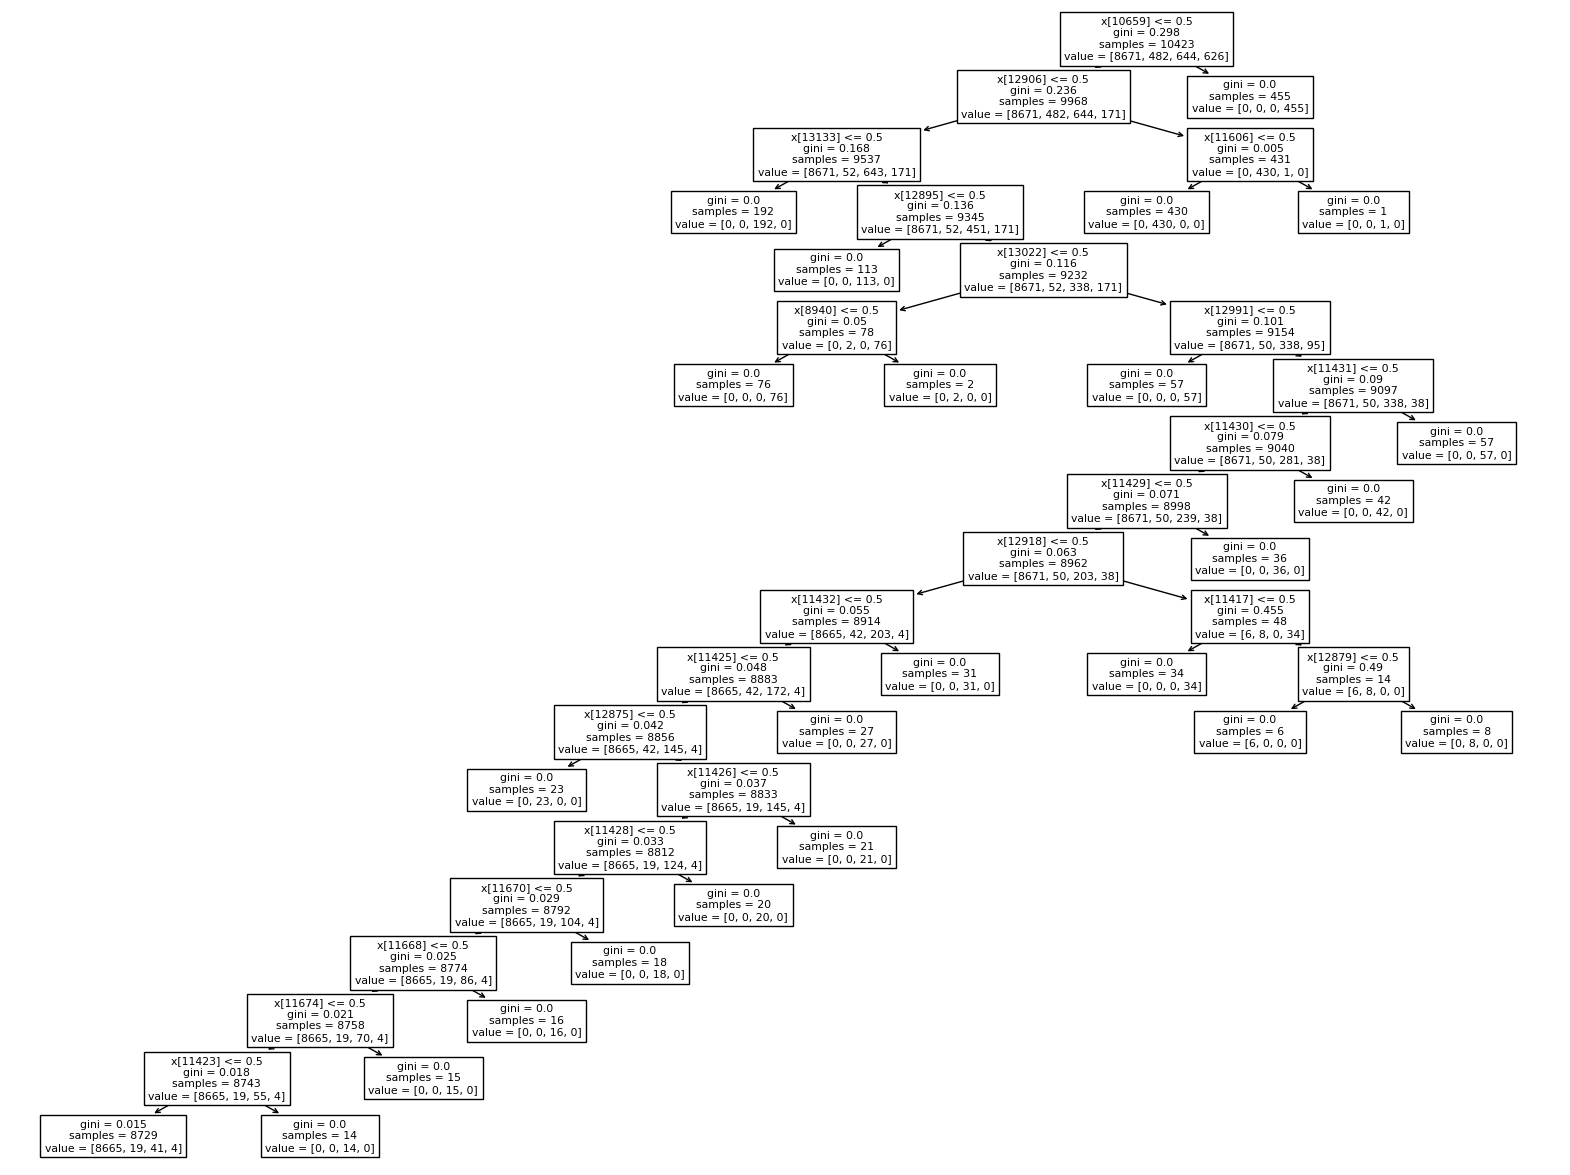

In [93]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(clf_gini_one.fit(X_train_enc.toarray(), y_train) )

In [94]:
y_test.value_counts()

Fraud
0    4294
3     312
2     290
1     239
Name: count, dtype: int64

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_one = confusion_matrix(y_test, y_pred_gini, labels=clf_gini_one.classes_)

print('Confusion matrix ghost \n\n', cm_one)

Confusion matrix ghost 

 [[4292    2    0    0]
 [   4  235    0    0]
 [  23    1  266    0]
 [   3    0    0  309]]


<Figure size 900x900 with 0 Axes>

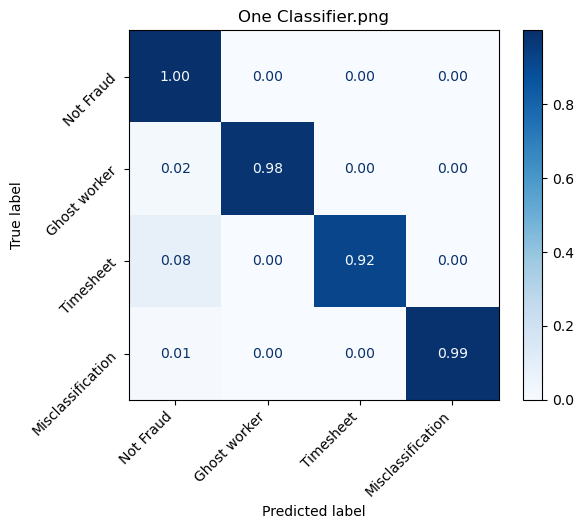

In [96]:
plt.figure(figsize=(9, 9))
# pl = ConfusionMatrixDisplay(cm_one_one, display_labels=clf_gini_one.classes_)
cm_one_normalized = cm_one.astype('float') / cm_one.sum(axis=1)[:, np.newaxis]
pl = ConfusionMatrixDisplay(cm_one_normalized,  display_labels=['Not Fraud', 'Ghost worker', 'Timesheet','Misclassification']            )
pl.plot(cmap=plt.cm.Blues, values_format='.2f')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')


plt.title("One Classifier.png")
plt.savefig("confusion_matrix_One_Classifier.png")
plt.show()

In [97]:
from sklearn.metrics import classification_report

print("-- ALL FRAUD -- \n")
 # accuracy = accuracy_score(y_test, y_pred_gini)
# print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred_gini))


-- ALL FRAUD -- 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4294
           1       0.99      0.98      0.99       239
           2       1.00      0.92      0.96       290
           3       1.00      0.99      1.00       312

    accuracy                           0.99      5135
   macro avg       1.00      0.97      0.98      5135
weighted avg       0.99      0.99      0.99      5135



In [98]:
# fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# roc_auc = roc_auc_score(y_test, y_proba)

## 2. Multilabel Classifier : DT

In [99]:
y_train_multi

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [100]:
clf_gini_multi = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)
# fit the model
clf_gini_multi.fit(X_train_enc_multi, y_train_multi)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [101]:
y_pred_gini_multi = clf_gini_multi.predict(X_test_enc_multi)

In [102]:
y_pred_gini_multi

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

### Evaluate

In [103]:
from sklearn.metrics import accuracy_score

accuracy_train_multi = accuracy_score(y_train_multi, clf_gini_multi.predict(X_train_enc_multi))
accuracy_test_multi = accuracy_score(y_test_multi, y_pred_gini_multi)

print("\n ----- ALL ----- \n ")
print("Accuracy on training set:", accuracy_train_multi)
print("Accuracy on test set: ", accuracy_test_multi)



 ----- ALL ----- 
 
Accuracy on training set: 0.9946272666218939
Accuracy on test set:  0.9943524829600779


[Text(0.75, 0.9761904761904762, 'x[10659] <= 0.5\ngini = 0.149\nsamples = 10423\nvalue = [[9941, 482]\n[9797, 626]\n[1752, 8671]\n[9779, 644]]'),
 Text(0.6875, 0.9285714285714286, 'x[12906] <= 0.5\ngini = 0.118\nsamples = 9968\nvalue = [[9486, 482]\n[9797, 171]\n[1297, 8671]\n[9324, 644]]'),
 Text(0.5625, 0.8809523809523809, 'x[13133] <= 0.5\ngini = 0.084\nsamples = 9537\nvalue = [[9485, 52]\n[9366, 171]\n[866, 8671]\n[8894, 643]]'),
 Text(0.5, 0.8333333333333334, 'gini = 0.0\nsamples = 192\nvalue = [[192, 0]\n[192, 0]\n[192, 0]\n[0, 192]]'),
 Text(0.625, 0.8333333333333334, 'x[12895] <= 0.5\ngini = 0.068\nsamples = 9345\nvalue = [[9293, 52]\n[9174, 171]\n[674, 8671]\n[8894, 451]]'),
 Text(0.5625, 0.7857142857142857, 'gini = 0.0\nsamples = 113\nvalue = [[113, 0]\n[113, 0]\n[113, 0]\n[0, 113]]'),
 Text(0.6875, 0.7857142857142857, 'x[13022] <= 0.5\ngini = 0.058\nsamples = 9232\nvalue = [[9180, 52]\n[9061, 171]\n[561, 8671]\n[8894, 338]]'),
 Text(0.5625, 0.7380952380952381, 'x[8940] <= 0.

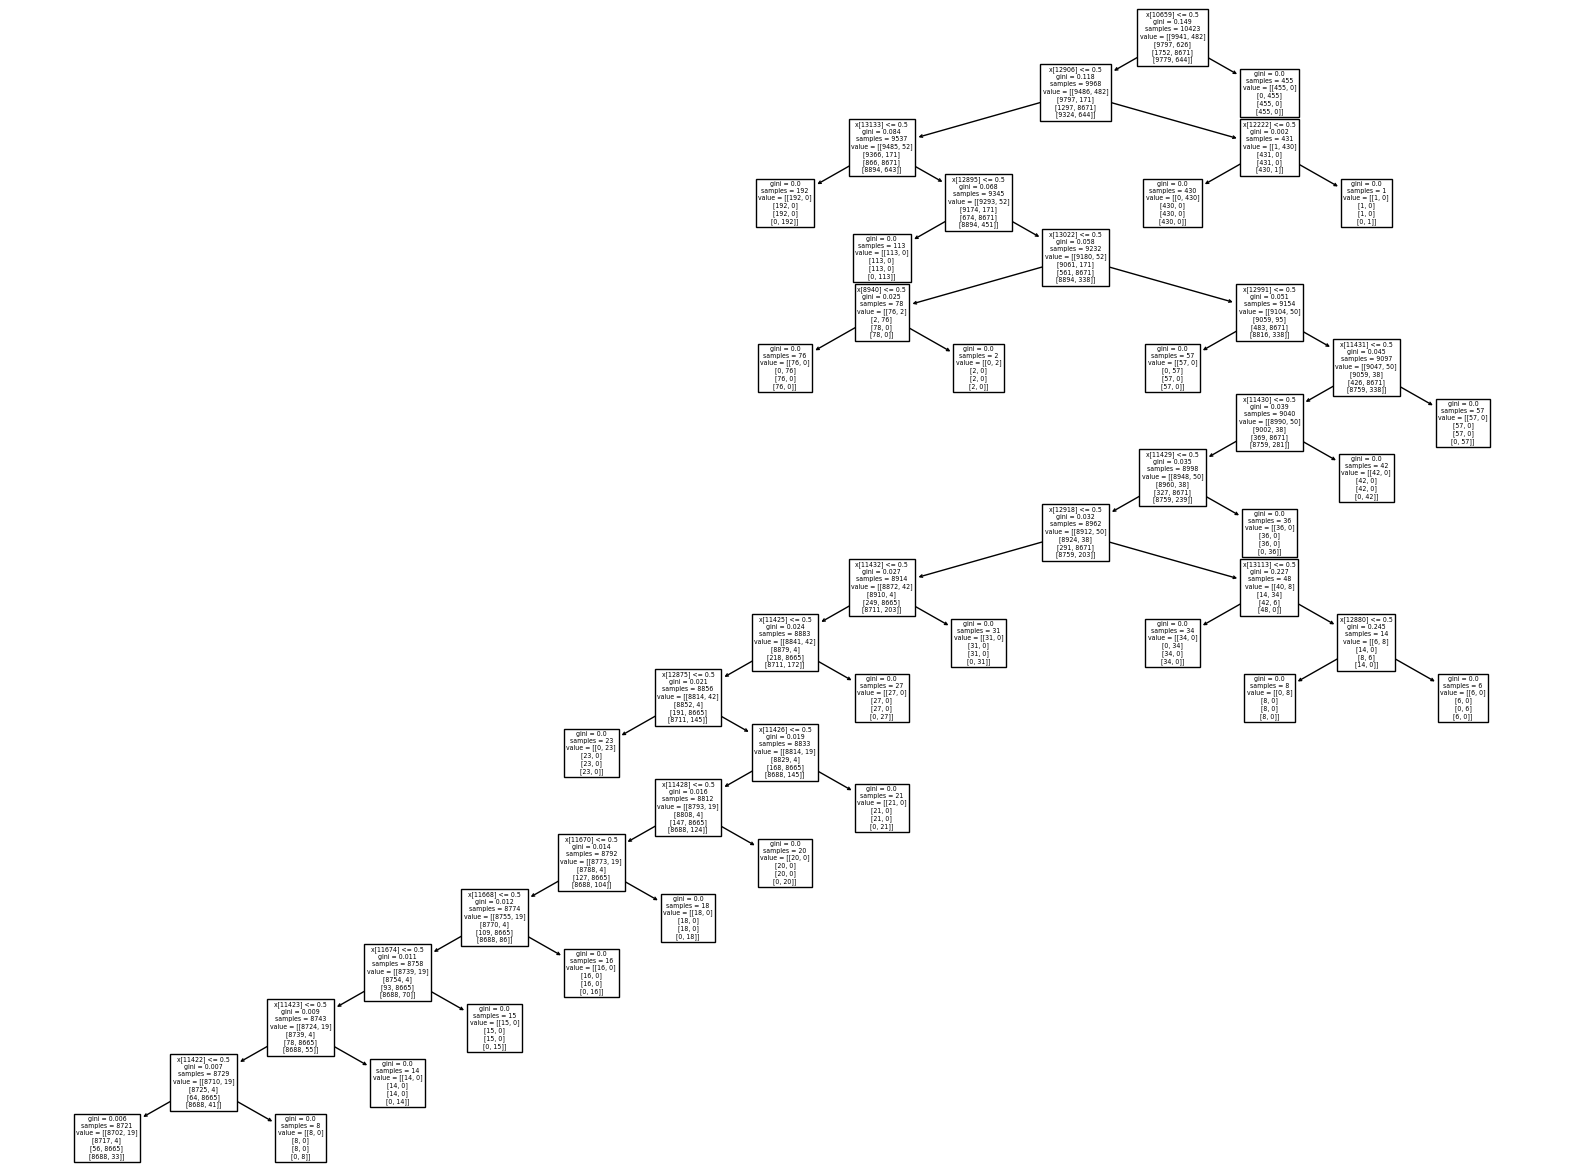

In [104]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(clf_gini_multi.fit(X_train_enc_multi.toarray(), y_train_multi) )

In [105]:
y_test_multi.shape

(5135, 4)

In [106]:
# y_pred_gini_multi = pd.DataFrame(y_pred_gini_multi)
# y_pred_gini_multi.shape

In [107]:
mlb.classes_

array(['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet'],
      dtype=object)

### Confusion Matrix

In [108]:
y_test_multi.shape

(5135, 4)

In [109]:
y_pred_gini_multi.shape

(5135, 4)

In [110]:
mlb.classes_.shape

(4,)

In [111]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

cm_multi = multilabel_confusion_matrix(y_test_multi, y_pred_gini_multi)


In [112]:
# Displaying the confusion matrix
classes = ['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet']
for i, cm in enumerate(cm_multi):
    print(f'Confusion Matrix for label {classes[i]}:')
    print(cm)

Confusion Matrix for label Ghost:
[[4894    2]
 [   4  235]]
Confusion Matrix for label Misclassification:
[[4823    0]
 [   3  309]]
Confusion Matrix for label Not Fraud:
[[ 814   27]
 [   2 4292]]
Confusion Matrix for label Timesheet:
[[4845    0]
 [  20  270]]


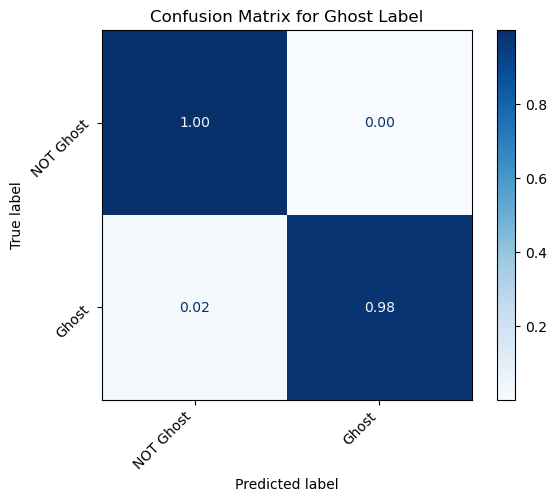

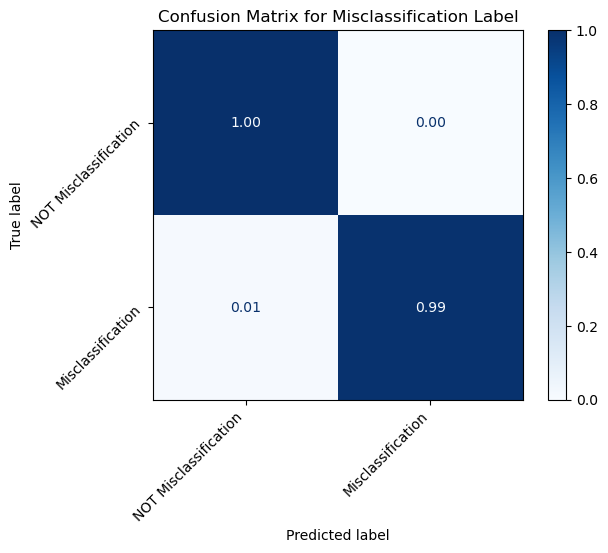

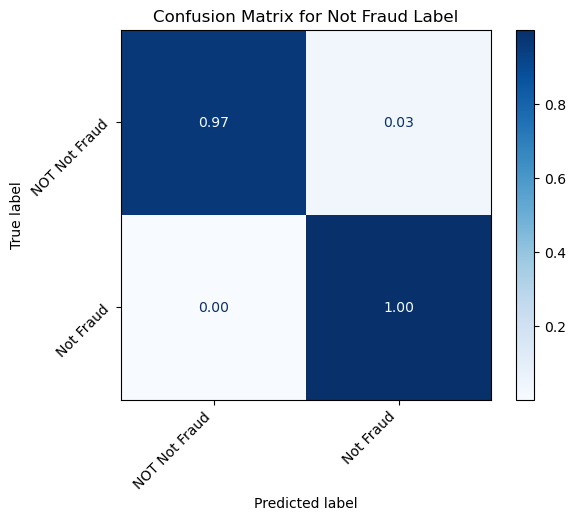

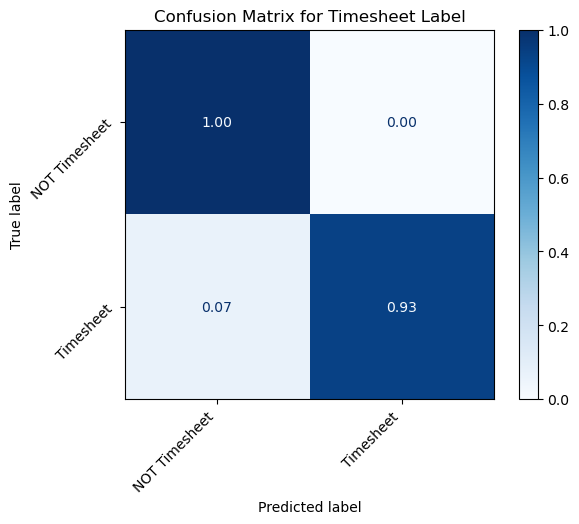

In [113]:
classes = ['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet']
for i, cm in enumerate(cm_multi):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[f'NOT {classes[i]}', f'{classes[i]}'])
    disp.plot(cmap=plt.cm.Blues, values_format='.2f')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.title(f'Confusion Matrix for {classes[i]} Label')
    plt.savefig(f'MultiLabel_{classes[i]}_Label.png')
    plt.show()

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test_multi, y_pred_gini_multi, target_names=classes))

                   precision    recall  f1-score   support

            Ghost       0.99      0.98      0.99       239
Misclassification       1.00      0.99      1.00       312
        Not Fraud       0.99      1.00      1.00      4294
        Timesheet       1.00      0.93      0.96       290

        micro avg       0.99      0.99      0.99      5135
        macro avg       1.00      0.98      0.99      5135
     weighted avg       0.99      0.99      0.99      5135
      samples avg       0.99      0.99      0.99      5135



In [115]:
y_pred_gini_multi

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

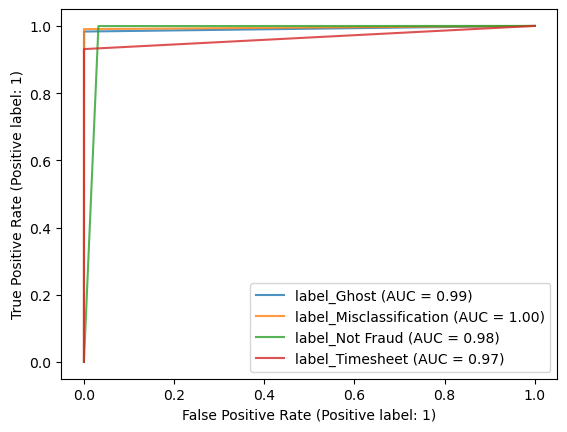

In [116]:
from sklearn.metrics import RocCurveDisplay

labelPlots ={}
for i in range (len(classes)):
  clf_gini_multi.fit(X_train_enc_multi, y_train_multi[:,i]) 
  ax = plt.gca()
  labelPlots[i]= RocCurveDisplay.from_predictions(y_test_multi[:,i],y_pred_gini_multi[:,i], name= 'label_'+classes[i], ax=ax, alpha=0.8)

plt.savefig('ROC_Curve.png')
plt.show()


# Test For Data with No NAN values

In [118]:
d_MGT_Test = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\4. Models\2. Classifier\0. Classifier Data\df_full\Test_Merged_Multilabel_Data\d_MGT_Multilabel_Test.csv")

In [120]:
X_test_multiLab = d_GTM.drop(columns=['Fraud'], axis=1)
y_test_multiLab = d_GTM.loc[:,['Fraud']]

In [121]:
X_test_enc_multiLab = encoder_multi.transform(X_test_multiLab)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Absence_CODE
- Absence_Reason
- CODENT
- CODSOR
- Classification
- ...
Feature names seen at fit time, yet now missing:
- Absence_CODE_999
- Absence_CODE_ABS
- Absence_CODE_CPN
- Absence_CODE_CSO
- Absence_CODE_CSS
- ...


In [ ]:
y_pred_gini_multi = clf_gini_multi.predict(X_test_enc_multi)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

cm_multi = multilabel_confusion_matrix(y_test_multi, y_pred_gini_multi)


In [ ]:
# Displaying the confusion matrix
classes = ['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet']
for i, cm in enumerate(cm_multi):
    print(f'Confusion Matrix for label {classes[i]}:')
    print(cm)

In [ ]:
classes = ['Ghost', 'Misclassification', 'Not Fraud', 'Timesheet']
for i, cm in enumerate(cm_multi):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=[f'NOT {classes[i]}', f'{classes[i]}'])
    disp.plot(cmap=plt.cm.Blues, values_format='.2f')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.title(f'Confusion Matrix for {classes[i]} Label')
    plt.savefig(f'MultiLabel_{classes[i]}_Label_no_NAN.png')
    plt.show()